# COGS 118A - Project Checkpoint

# Names


- Abraham Torok
- Rohil Ahuja
- Brinda Narayanan
- Jorge Acevado

# Abstract 


Our goal is to create a multi-class classification model to determine the genre of novel songs based on our database called music genre classification, consisting of roughly 18,000 songs described with 15 numerical features. The original dataset was used in an online Hackathon. After exploring the data, we will be using a Random Forest model to classify our data. We selected a random forest as one of our models, as it has the capacity to handle high-dimensional data with many numerical features. We will also use an SVM as a separate model to compare the accuracy between different types of multiclass models. Our performance will be measured by implementing a log-loss metric and this can be cross-referenced with the winners of the original competition as well as submissions from Kaggle where the dataset was made publicly available.

# Background

With the onset of streaming services such as Spotify and Apple Music, people are constantly listening to music and trying to expand their music taste. As access to music has increased, classification between different genres of music has become much more important to the general population as the number of genres increase. There are 10 major classifications of music: <br>
1. Pop
2. Rock
3. Indie Rock
4. EDM
5. Jazz
6. Country
7. Hip Hop & Rap
8. Classical Music
9. Latin Music
10. K-pop <a name = 'analyticsteps'></a>[<sup>[1]</sup>](#analyticstep).
<br>

Using machine learning to help classify music genres is a relatively new concept, but is something that has been shown to have great potential, especially in the realm of recommendations. Previous work to classify into different categories has been done with different types of models, such as one example with a convoluted neural network. This particular method used audio signals to determine the genre. The particular dataset that was used contained a csv with many different quantifications of the particular song, as well as an audio recording of that song. From the audio recording, they examined the wav graphs in conjunction with the numerical data. From this data they constructed their classifier which worked with 92.93% accuracy. <a name = 'clairvoyant'></a>[<sup>[2]</sup>](#clairvoyant). <br>

From Kaggle, we can also see many other projects that were completed. These projects use different types of machine learning models in order to classify the different songs into genres. One of the algorithms did some clustering using PCA and TSNEs to cluster the data into different points. Another algorithm used a random forest to classify the different songs into genres. All of these different methods had high accuracy, and developed a recommendation system once the model was trained and complete to recommend songs to users <a name="kaggle"></a> [<sup>[3]</sup>](#kaggle).


# Problem Statement

Our problem revolves around classifying songs into different music genres. For many listeners of music, a large issue is discovering new music that fits into genres the user is interested in. Users do not want to have to listen to many new songs in order to just find music in their genre, then narrowing down even further into music that fits their taste. By creating a classifier that can group music into different genres, we can help create better music recommendations for users looking to discover new songs. We will be comparing different types of models, specifically a random forest model and a support vector machine, and training both of them to do the classification of new songs. <br>

Given many different numerical measures of a song such as loudness, acousticness, and instrumentalness, we can classify a new song into one of our pre-existing labels from the training data. All these observations should be easily measurable, simply through the song itself, using particular 3rd-party tools to extract the data from a new song. Because the measurements are all taken directly from the songs, they should be very easy to replicate as well. As there are many different softwares, the data could be slightly different between different types of software, but most should be negligible noise.  In addition, the problem is quantifiable because we can use the error metrics (F1 Score and Log Loss) to quantify the performance of a model for music genre classification.

# Data


Dataset link: https://www.kaggle.com/datasets/purumalgi/music-genre-classification?select=train.csv

The Dataset comes from a MachineHack Hackathon in which 15 numeric features are provided for each song along with an artist name and title. The data is already split into training and testing csvs, with ~18000 observations in the training set and ~7,700 observations in the testing set. The features for each observation consist of quantitative variables such as key, tempo, time signature, as well as qualitative variables such as liveness, danceability, and speechiness. The data is already quite clean, with minimal missing data and all fields are numerical, so pre-processing will be minimal. We employed the simple imputer from sklearn to replace missing values with the column mean. 
Some critical variables of our dataset is the Class which is our target variable and represents the music genre in numerical format (eg 1 for rock, etc) The instrumentation variables are also critical as they help train the data, and these variables (danceability, acousticness, etc) are also represented numerically.


During our explorating of the data, it became apparent that some of our features such as speechiness and instrumentalness had an exponential distribution, and in order to normalize these features and reduce the skew, we performed a log transformation.

## Features Pre-Transformation
skew: 1.53 and 3.0 respectively
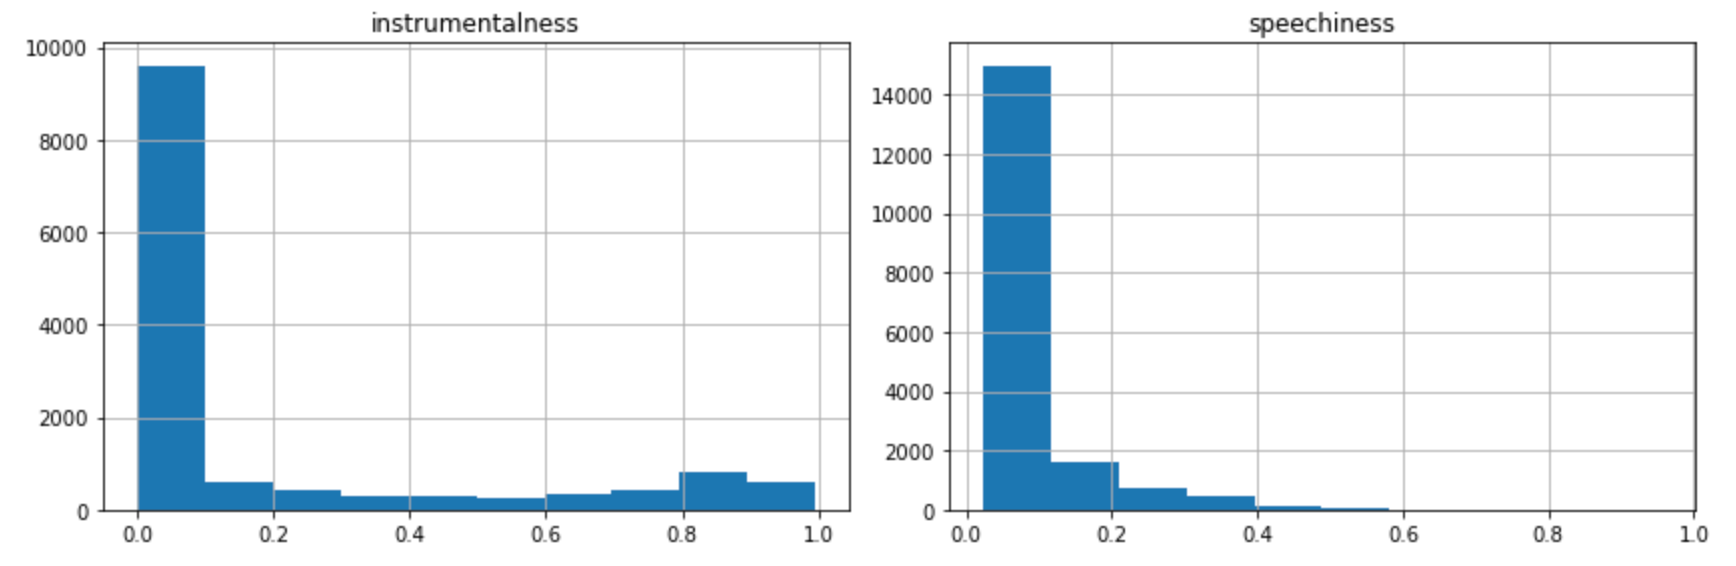


## Features Post-Transformation
skew: -0.2 and 1.16 respectively
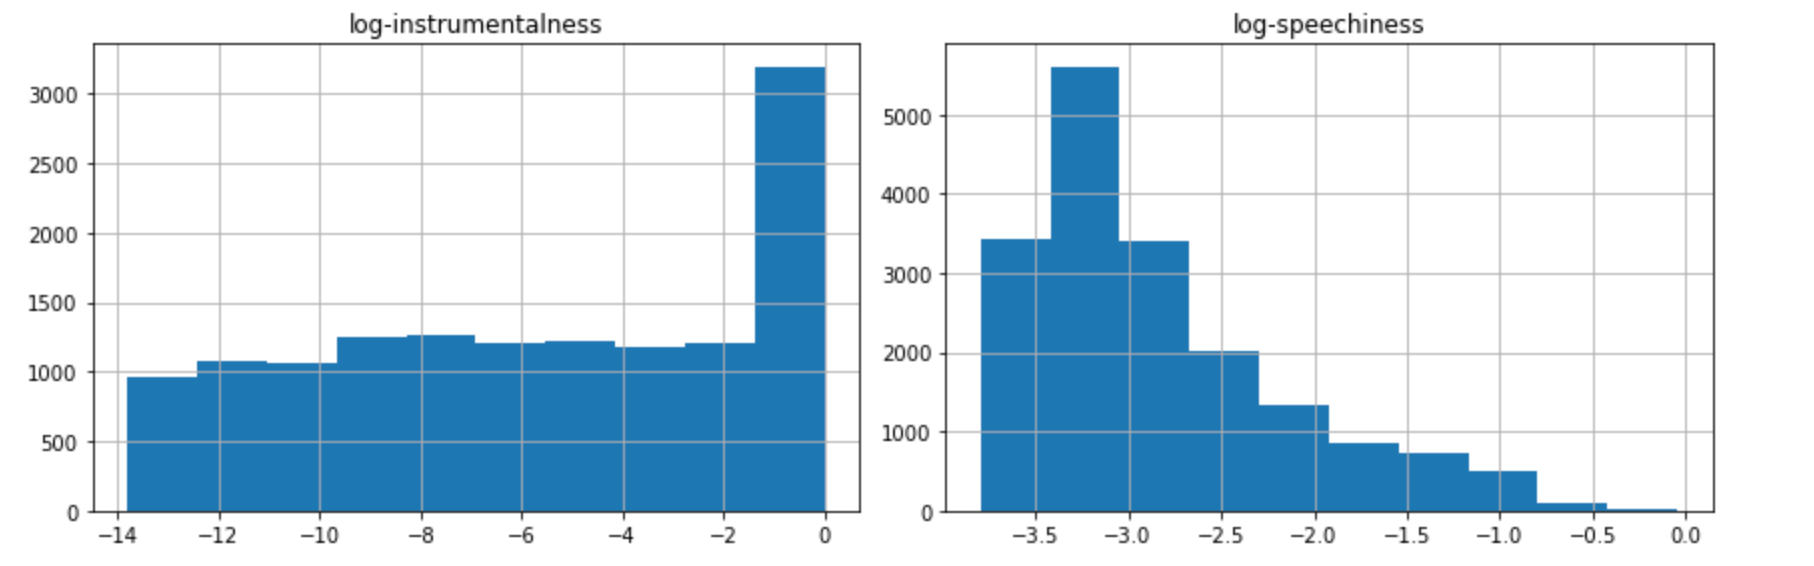
This transformation has drastically reduced the skew of our data and should provide better results in the final classifier model.

# Proposed Solution

Some possible solutions to the problem of classifying songs into different music genres is to use machine learning algorithms to automatically learn patterns and characteristics of different genres based on their audio features. Two such algorithms are the Support Vector Machine (SVM) classifier and the Random Forest classifier.

To apply either of the algorithms to our dataset of roughly 18,000 songs and 15 numerical features, we would first need to perform some data preprocessing. In this step, we need to preprocess the data by extracting relevant features from the songs. Some of these include danceability, energy, key signature, loudness, acousticness, tempo, etc. Extracting these features allows us to compare the songs and helps in classifying the genres.

Next, we perform data splitting. For this we need to split the dataset into training, validation, and testing sets. The training set is used to train the classifiers, while the validation set is used to tune the hyperparameters of the model. Finally, the testing set is used to evaluate the performance of the trained classifier. 

To train our model using the random forest algorithm we will use the 15 numerical features as input and the genre label as the output. The model would be optimized by tuning hyperparameters such as the number of trees in the forest and the maximum depth of each tree. In training the SVM classifier, we will experiment with different kernel functions and tune the hyperparameters using techniques like cross-validation to find the optimal kernel coefficient and regularization parameter.

To evaluate the performance of our models, we would use metrics such as accuracy, precision, recall, and F1 score. We would also compare the performance of models to a benchmark model such as a logistic regression classifier or a K-Nearest Neighbor classifier which have been shown to work well in music genre classification tasks. Doing this comparison of our models with the benchmark models would allow us to demonstrate the effectiveness of our proposed solution.

To implement the solution, we can use Python and the scikit-learn library, which offers an implementation of the SVM and random forest classifiers. We could use train_test_split from the same library to split the dataset into training and testing sets. The preprocessing of the data could be done using the StandardScaler function from the scikit-learn library.

# Evaluation Metrics

Some evaluation metrics we can employ are the f1 metric for each One vs. Rest classifier as well as the recommended Log Loss Metric that was used in the original scoring of the model accuracy during the competition this dataset was originally intended for. Another possible metric we can use is accuracy.

F1 Score = F1 score = 2 * (precision * recall) / (precision + recall)

Log Loss:

![log_loss_eqn.png](./log_loss_eqn.png)

Accuracy = (True Negatives + True Positives) / (True Negatives + False Negatives + True Positives + False Negatives)

F1 score is a balanced measure of precision and recall, providing an overall measure of the model's accuracy. We will use a weighted F1 score in order to account for the uneven distribution of class labels in our dataset. The weighted F1 score will scale the score for each class by the number of observations. A high F1 score means that the model is accurately classifying instances as positive, while also minimizing the number false positives and false negatives. In the context of our problem statement, a high F1 score means that our model is accurately classifying songs into different genres, while also minimizing the risk of recommending songs that do not fit the user's preferred genres.

Log loss measures the difference between the predicted probabilities of each class and the true probabilities, where a lower log loss value indicates better performance. Log loss takes into account not only the correctness of the predicted class but also the confidence in the prediction, which can be important in cases where some classes are more similar to each other than others. In the context of our problem statement, log loss would provide a more nuanced understanding of the performance or our model by considering the probability distribution of the predicted classes. A low log loss value would indicate that the model is accurately predicting the probabilities of each class, which is importnant for providing users with relevant and diverse music recommendations.

Accuracy is the most straigntforward metric for evaluating classification models, as it simply measures the proportion of correct predictions out of all predictions made. In the context of our problem statement, accuracy tells us the percentage of correctly classified songs out of all the songs that were classified. This metric is important because it directly reflects the user experience - the higher the accuracy, the more likely users will find music in the genres they are interested in.

Ultimately, we decided to focus on accuracy and F1 score as our primary evaluation metrics because they are easier to interpret and more directly relevant to our problem statement. We believe that accurately classifying songs into their respective genres is the most important aspect of our problem, and accuracy and F1 score are well-suited to evaluate this performance.

# Preliminary results








For our baseline model, we employed a support vector classifier with a radial basis function kernel, and did a grid search over 4 values of C, ranging from 0.1 to 100.
The normalization of our exponentially distributed features provided a marginal improvement to the best f1 score, going from around 0.49 to 0.501.
For the Pipeline, we used the StandardScaler and SimpleImputer replacing missing values with the column mean before classifying our data.

## SVM Classifier Code Snippet
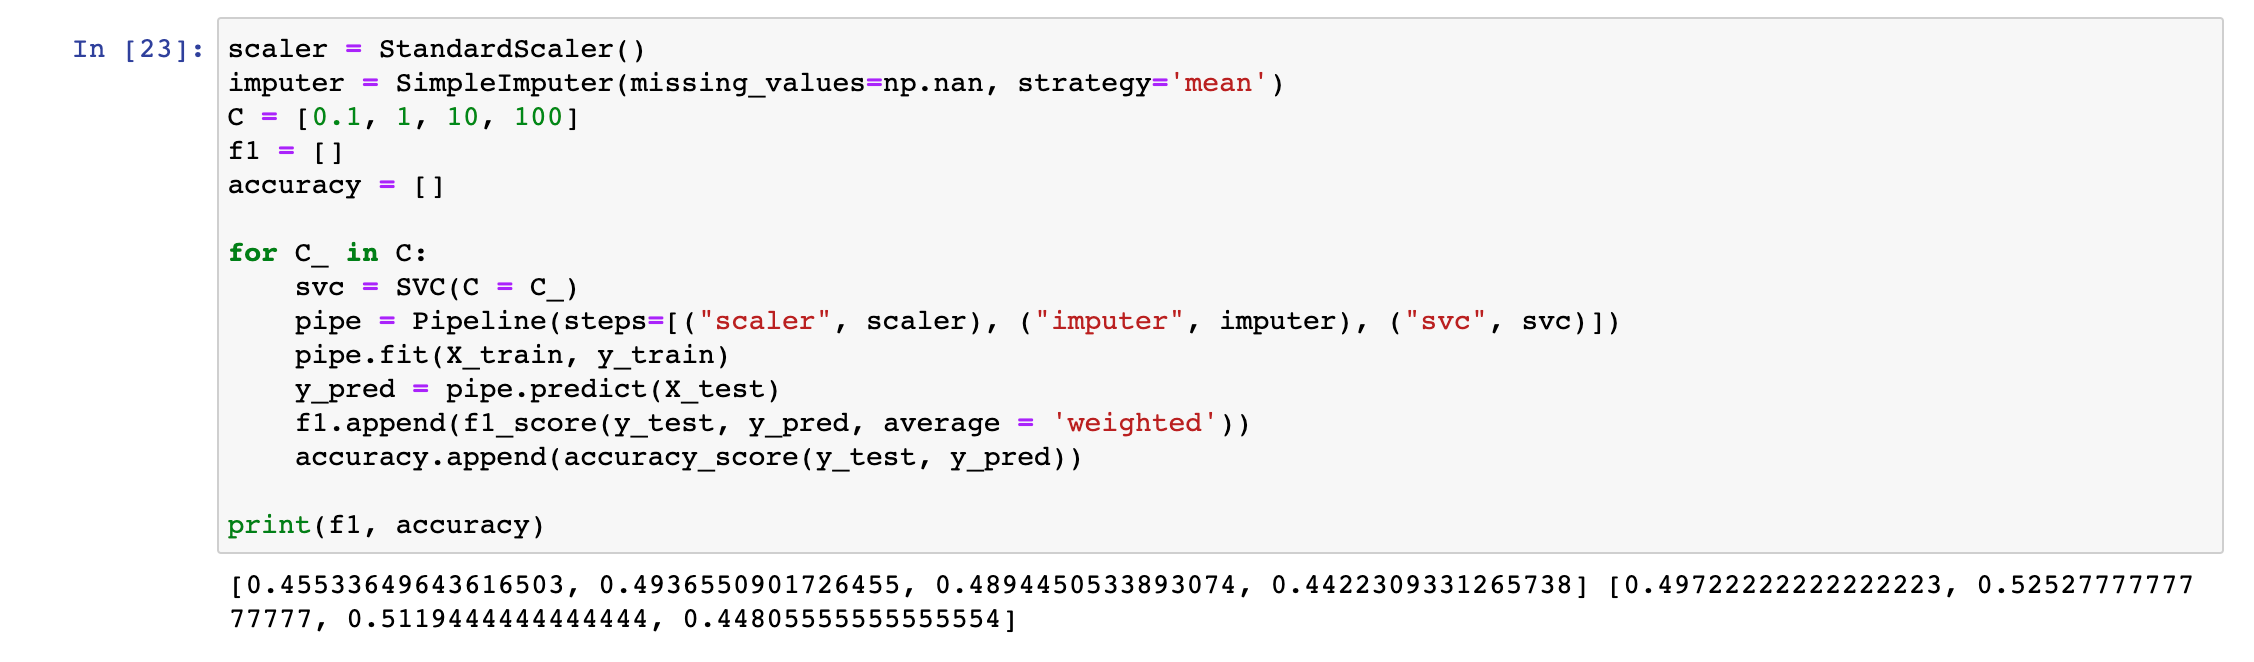

## Support Vector Classifier over varying Regularization Strength
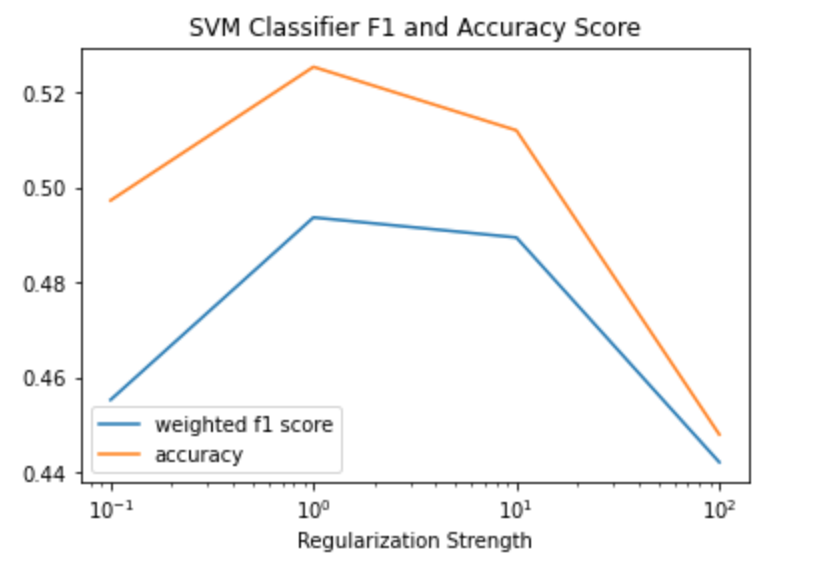

## Confusion Matrix with best Regularization Strength (C = 1)
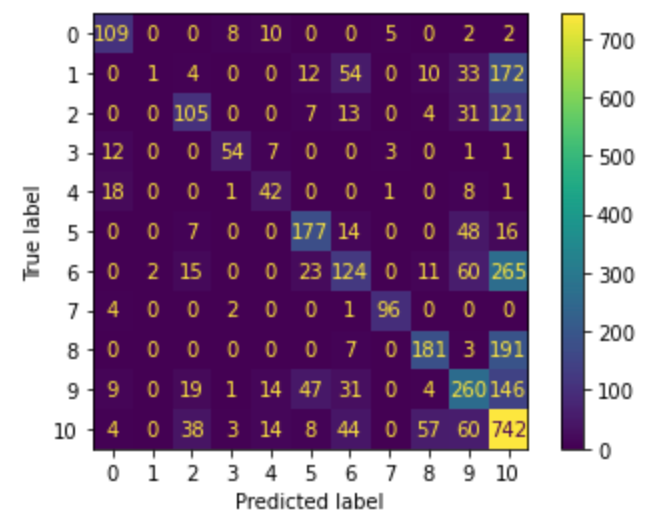
It is clear from our results thus far that predictions for class 1 need to be a priority moving forward as there was only one true positive and over 200 false negatives

## Random Forests Code Snippet
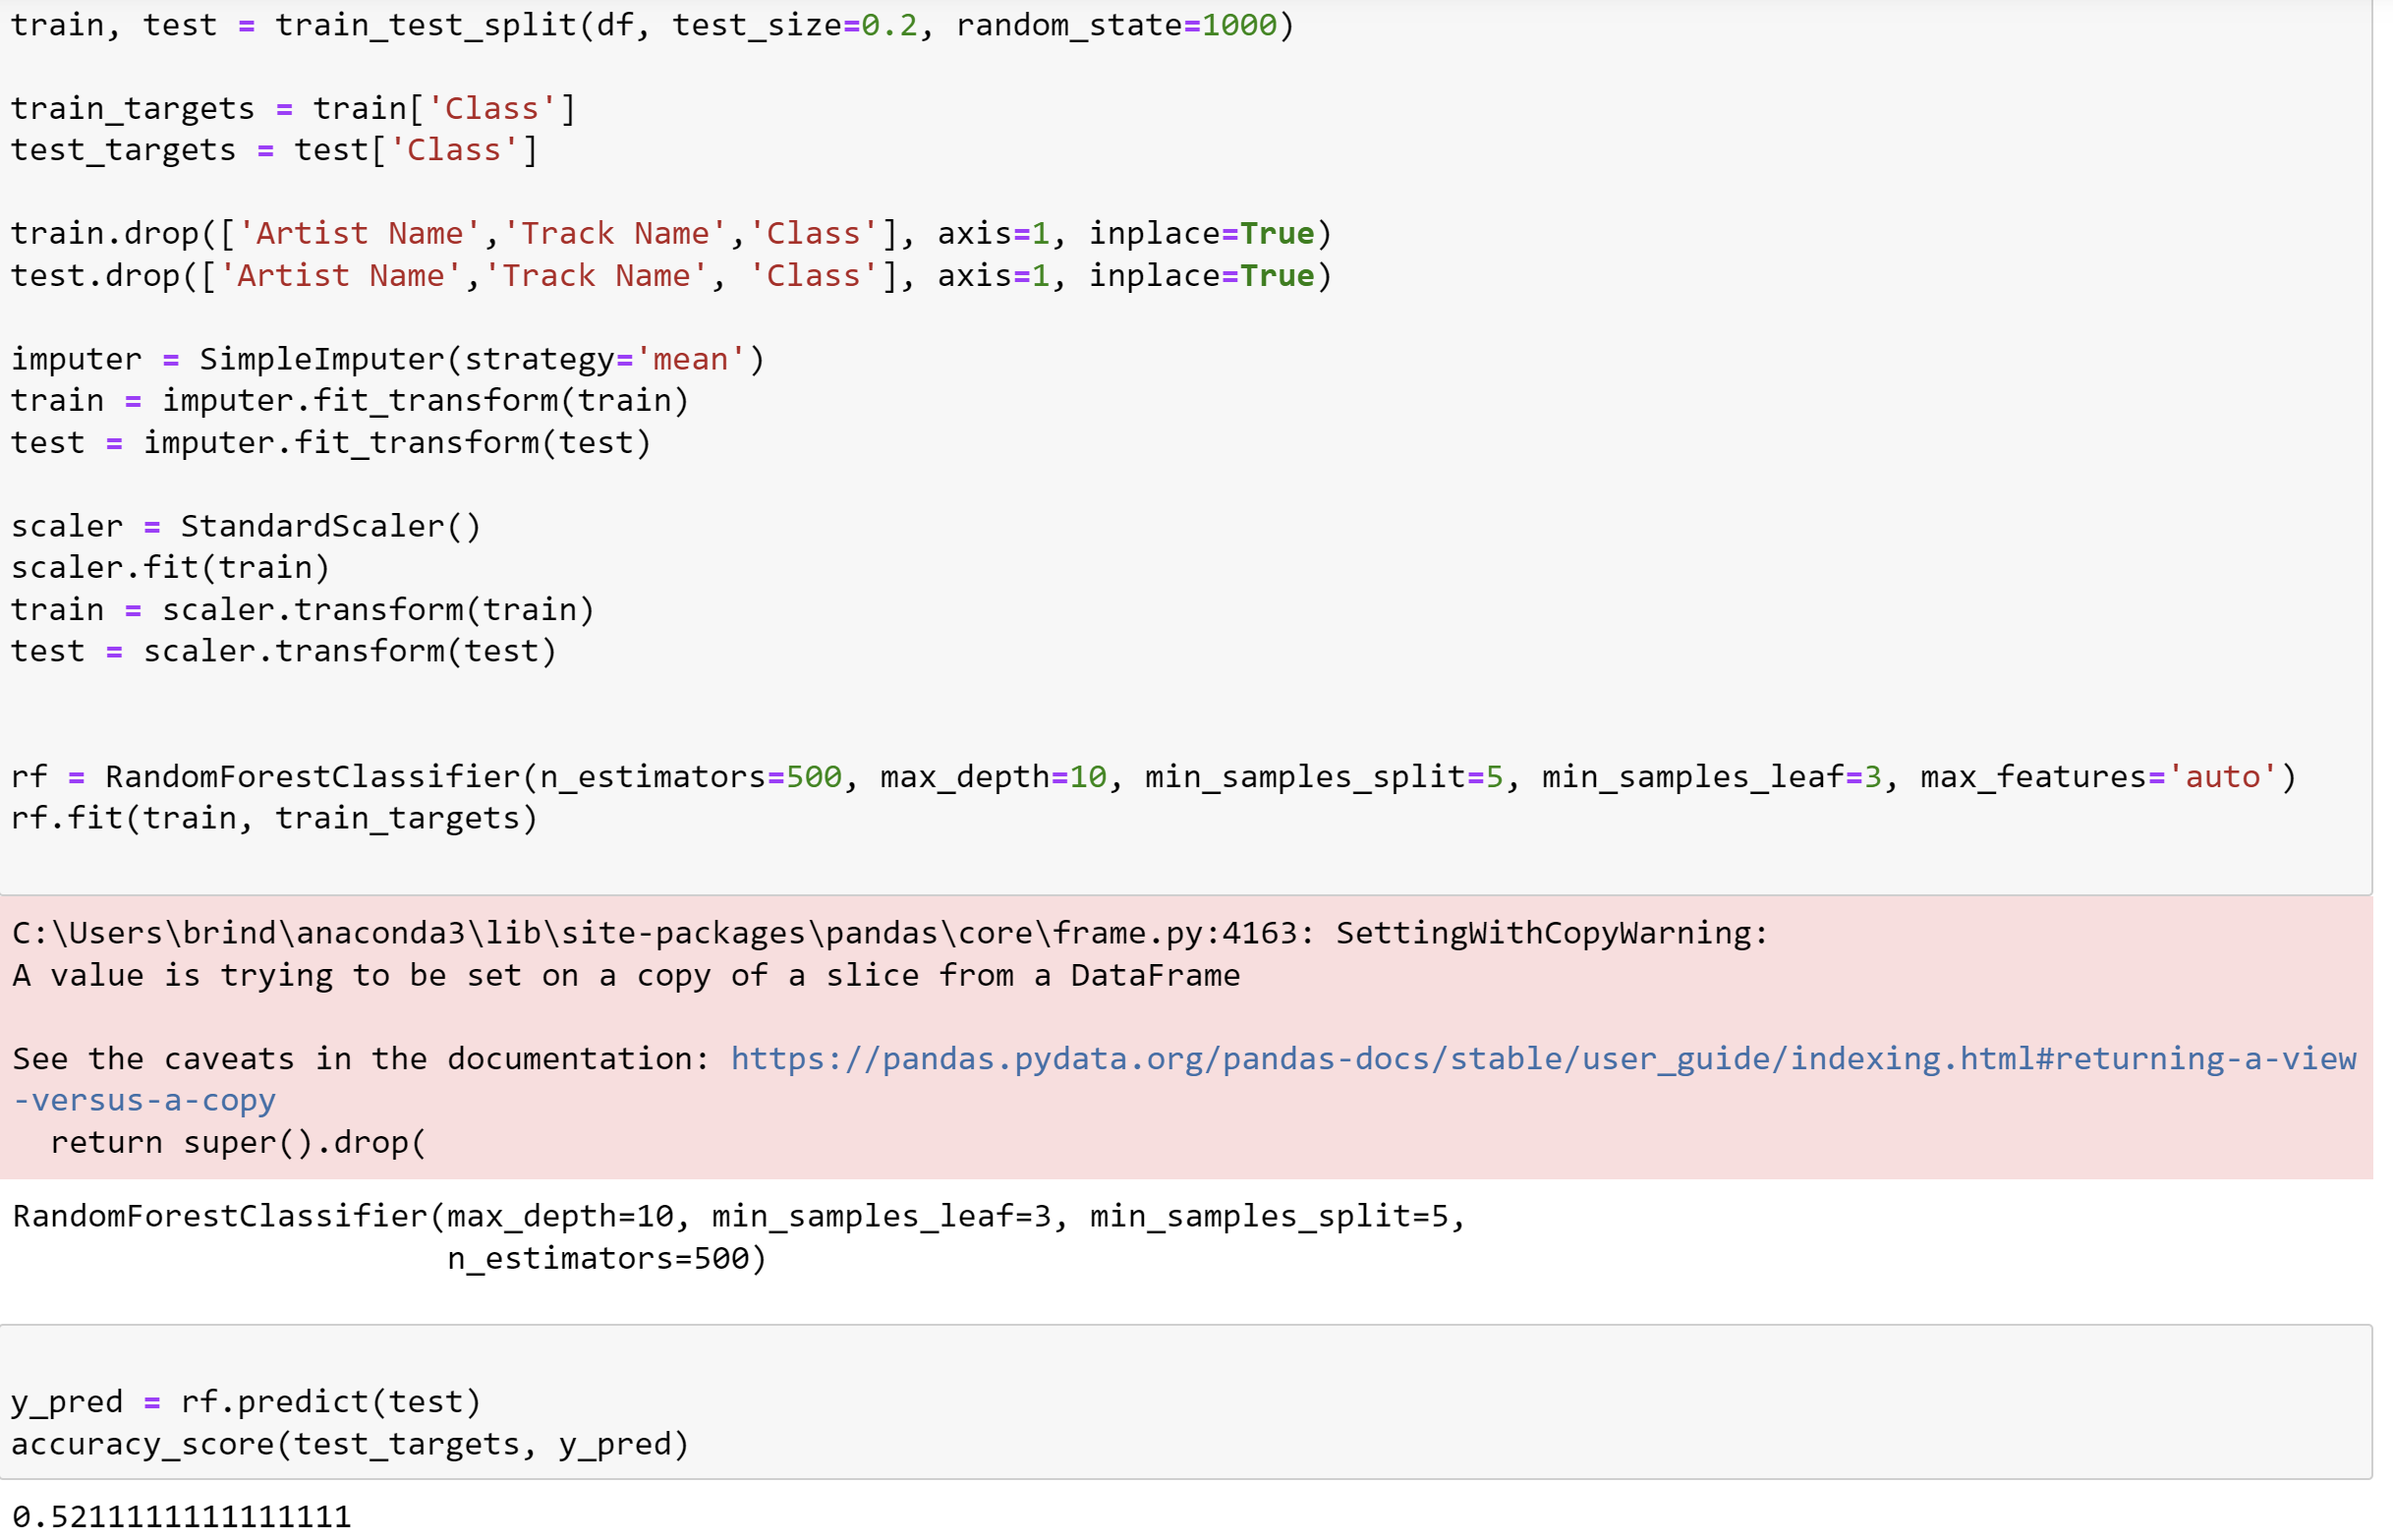
Comparing the two models with their current hyperparameters shows a very similar accuracy, both sitting at just over .52

# Ethics & Privacy

There are no privacy issues with this project as we are using public data from Kaggle. Because of that, there are terms of use all users sign before making an account and posting their dataset, and getting their data. 

Potential Ethical Concerns are that the data is subjective. We don’t know how one would determine “speechability” and “Danceability” however our goal for this project is to build an ML algorithm that classifies music genres, so we will still be able to do our project.  The ML algorithm could possibly be misguided and overfit.

# Team Expectations 

All team members are expected to attend regular weekly meetings to ensure that we share our progress and clarify any concerns or doubts.
Every team member should proofread all parts of the project (code, writing, visuals) to ensure there are no biases and ensure complete understanding of the project.
If disagreements about how to proceed arise, discuss the issue with the group and vote on which direction to take to ensure project completion.

EDA: We will divide the dataset into four different parts and work on EDA separately. 
Model: After finishing EDA we will come together and discuss a model that works with our EDA
-- In weekly meetings we will discuss algorithms and categories that work together for our project.

We've set our goals in the timeline below

EDA - Everyone

Code - Rohil, Brinda and Abraham

Writing & Analysis - Jorge, Brinda, Abraham 


# Project Timeline Proposal



| Meeting Date  | Meeting Time | Completed Before Meeting  |
|---|---|---|
| 3/15  | 2 PM  | Hyperparameter search and tuning completed |
| 3/22  | 2 PM  | Finalize product and complete analysis, discuss final edits and create presentation |

# Footnotes
<a name="analyticsteps"></a>1.[^](#analyticsteps): Rawat, Soumyaa. “Music Genre Classification Using Machine Learning.” Analytics Steps, https://www.analyticssteps.com/blogs/music-genre-classification-using-machine-learning. <br> 
<a name="clairvoyant"></a>2.[^](#clairvoyant): “Music Genre Classification Using CNN.” Clairvoyant, https://www.clairvoyant.ai/blog/music-genre-classification-using-cnn. <br>
<a name="kaggle"></a>3.[^](#kaggle): Malgi, Purushottam. “Music Genre Classification.” Kaggle, 7 Aug. 2021, https://www.kaggle.com/datasets/purumalgi/music-genre-classification/code?select=train.csv. 
